# Random Forest Classifier

# Step 1: Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Load the data

In [2]:
data_path = 'activity_data.csv'
data = pd.read_csv(data_path)

# Step 3: Preprocess the data

In [3]:
def preprocess_data(data):
    # Convert categorical columns to numeric
    label_encoders = {}
    for column in ['Month', 'VisitorType']:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])
    
    # Convert boolean columns to numeric
    data['Weekend'] = data['Weekend'].astype(int)
    data['Revenue'] = data['Revenue'].astype(int)
    
    # Split data into features and target
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
    
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

X, y = preprocess_data(data)

# Step 4: Split Data into Training and Testing Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model and Make Predictions

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
forest_predictions = forest_model.predict(X_test)

# Step 6: Evaluate the model

In [6]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define an evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation of {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 80)

# Evaluate Random Forest model
evaluate_model(y_test, forest_predictions, "Random Forest")

Evaluation of Random Forest:
Accuracy: 0.8957826439578265
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466

--------------------------------------------------------------------------------


# Step 7: Visualizing Results

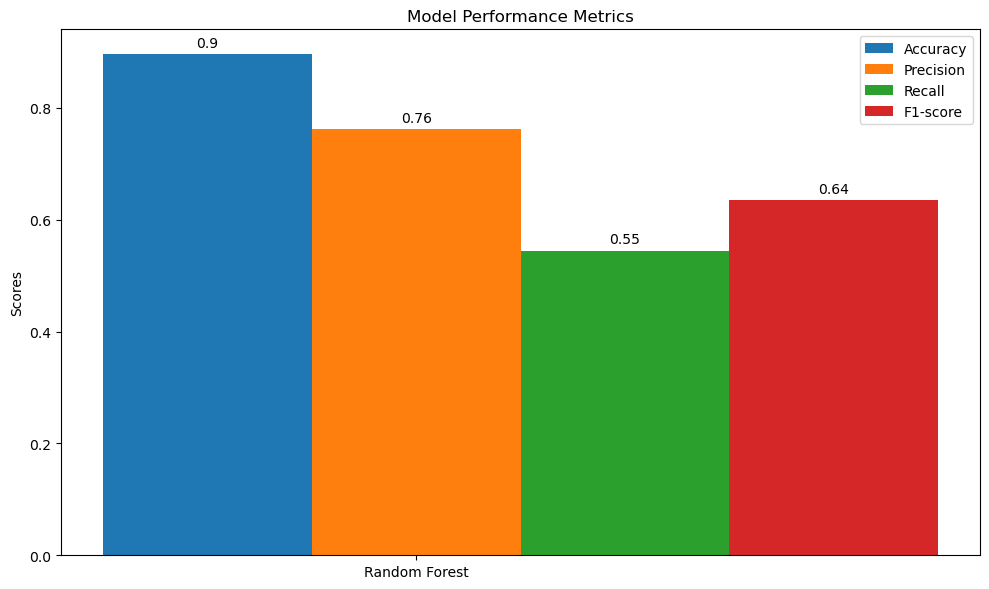

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define function to plot metrics
def plot_metrics(model_names, accuracy, precision, recall, f1_score):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    x = np.arange(len(model_names))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
    rects2 = ax.bar(x, precision, width, label='Precision')
    rects3 = ax.bar(x + width, recall, width, label='Recall')
    rects4 = ax.bar(x + 2*width, f1_score, width, label='F1-score')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()

    plt.show()

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, forest_predictions)
precision_rf = classification_report(y_test, forest_predictions, output_dict=True)['1']['precision']
recall_rf = classification_report(y_test, forest_predictions, output_dict=True)['1']['recall']
f1_score_rf = classification_report(y_test, forest_predictions, output_dict=True)['1']['f1-score']

# Plot metrics
plot_metrics(['Random Forest'], [accuracy_rf], [precision_rf], [recall_rf], [f1_score_rf])
